In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
#from google.colab import drive#to open the google drive in colab
#drive.mount('/content/drive')


In [28]:
#read all parameters of header
timeSteps=[]
boxDim=[]
num_frame=0

with open(r'C:\vmd\nvt') as fp:
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/disc/12rc/170lig/bare/rc1.0/nvt') as fp:

        for line in fp:
            if 'ITEM: TIMESTEP' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: NUMBER OF ATOMS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    timeSteps.append(line)# add the string in to the list
                    num_frame+=1
                    

            if 'ITEM: NUMBER OF ATOMS' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: BOX BOUNDS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    num_atom=int(line)  

            if 'ITEM: BOX BOUNDS' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: ATOMS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    
                    boxDim.append(line)               
                    

In [29]:
#read coordinate part
time_counter=0
lines=[]

#df.loc[:,'x'] = df.loc[:,'x'].astype(float)
with open(r'C:\vmd\nvt') as fp:
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/rod/8rc/76lig/homo/corNpAij/nvt') as fp:  
       
       for line in fp:
            atom_counter=0
            
            if 'ITEM: ATOMS' in line:
                time_counter+=1                                         
                
                for line in fp: # now you are at the lines you want
                    atom_counter+=1

                    #x(time_counter,atom_counter)=df.loc[line,'x'] 
                                        
                    if 'ITEM: TIMESTEP' in line: 
                     break 
                    
                    
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    lines.append(line)# add the string in to the list
                    #lines[time_counter][atom_counter]=line# add the string in to the list
                   
                    

In [30]:

num_frame
#num_atom
#boxDim #i have to modify the code to get x max x min and so on for box dimensionpr


31

In [31]:
#remove empty lines from the list
while("" in lines) : 
    lines.remove("") 

In [32]:
#data frame for the whole dump file without separating by frame
df=pd.DataFrame(lines, columns=['atomID']) # to make a data frame of pandas from the list and put atomID name on the column
df[['atomID','atomType','x','y','z']] = df.atomID.str.split(expand=True,) # to split one column to multiple columns and allocate name for each column
#df

In [33]:
df.iloc[1]

atomID       7699
atomType        3
x           0.549
y           0.550
z           0.000
Name: 1, dtype: object

**lines of data frame is read for each frame**

**read the center of mass of NP**

#  very important: to read all lines in the entire dump file( all the lines of all the frames)

In [34]:
type_Frame=np.zeros((num_frame,num_atom))


In [35]:
for i in range (0, num_frame):
   
   type_Frame[i,:]=df.atomType.values[(i*num_atom):((i*num_atom)+num_atom)] #thankGOD! to read x values for each frame and put in an array

In [36]:
for i in range (0, num_frame):
  num_atom_type=0
  for k in range (0, num_atom):
     if type_Frame[i,k]==5: #we only read atoms of core of NP with atom type 5
       num_atom_type+=1

In [37]:
num_atom_type

1749

In [38]:
ID_X_Frame=np.zeros ((num_frame+1,num_atom_type+1))
ID_Y_Frame=np.zeros ((num_frame+1,num_atom_type+1))
ID_Z_Frame=np.zeros ((num_frame+1,num_atom_type+1))

In [39]:
time_counter=0
for i in range (0, num_frame):
  atom_counter=0
  time_counter+=1
  for k in range (0, num_atom):
     if type_Frame[i,k]==5:
       atom_counter+=1
       
 #print(time_counter,"",atom_counter)
       ID_X_Frame[time_counter,atom_counter]=df.x.values[k]

should we consider image flages as we did for catenane in MD???
 here in dump of DPD I did not save image flages!

In [40]:
#calculate center of mass 

mass=1 #each bead mass

Xcm=np.zeros(num_frame+1)
Ycm=np.zeros(num_frame+1)
Zcm=np.zeros(num_frame+1)

total_mass= num_atom_type * mass

time_counter=0
for i in range (0, num_frame):
  atom_counter=0
  time_counter+=1
  Xoverall=0 # after each frame this will be zero so count from begining for next frame
  Yoverall=0
  Zoverall=0
  for k in range (0, num_atom):
     
     if type_Frame[i,k]==5: #core beads of NP
       atom_counter+=1
  
       ID_X_Frame[time_counter,atom_counter]=df.x.values[k]
       ID_Y_Frame[time_counter,atom_counter]=df.y.values[k]
       ID_Z_Frame[time_counter,atom_counter]=df.z.values[k]

       Xoverall = Xoverall + ID_X_Frame[time_counter,atom_counter]
       Yoverall = Yoverall + ID_Y_Frame[time_counter,atom_counter]
       Zoverall = Zoverall + ID_Z_Frame[time_counter,atom_counter]

       Xcm[time_counter] = Xoverall/total_mass
       Ycm[time_counter] = Yoverall/total_mass
       Zcm[time_counter] = Zoverall/total_mass     
       


In [41]:
for i in range (0, num_frame):
  print(i,'',Zcm[i]) #here the center of box is in wall so Np is located above EG with distsnce around 14.9 nm so Zcm starts from 14.9 and when np go inside EG and be closer to wall the Zcm also decreases.
#Xoverall

0  0.0
1  15.259174385363085
2  14.180729559748439
3  13.908161806746708
4  13.77309891366495
5  13.804561463693526
6  13.798803316180665
7  13.745030303030292
8  13.746795311606634
9  13.69178101772442
10  13.535180674671256
11  13.464051457975984
12  13.246321898227563
13  13.209778730703269
14  13.136929674099479
15  13.117069754145254
16  13.092044596912526
17  13.10287478559177
18  13.068311606632372
19  13.058849628359054
20  13.067221841052044
21  13.05479016580904
22  12.903744425385947
23  12.933887935963416
24  12.940596340766142
25  12.933953116066322
26  12.932694110920517
27  12.892380217267013
28  12.886279588336192
29  12.877262435677531
30  12.876220697541452


**calculate MSD**

In [42]:
#non time average msd of center of mass of NP
Xmsd=np.zeros (num_frame)# make 1D arrays
Ymsd=np.zeros (num_frame)
Zmsd=np.zeros (num_frame)
Rmsd=np.zeros (num_frame)

for i in range (1, 2):#thank god I should use frame one bc frame zero is zero but in future I shoul fix the frame zero so can have all frames info
 
 for t in range (1, num_frame):  

        
         
        dx=Xcm[t]-Xcm[i]
        dy=Ycm[t]-Ycm[i]
        dz=Zcm[t]-Zcm[i]       
        
        Xmsd[t]+=np.power(dx,2)
        Ymsd[t]+=np.power(dy,2)
        Zmsd[t]+=np.power(dz,2)
        
        Rmsd[t]= Xmsd[t]+Ymsd[t]+ Zmsd[t];
       
        print(t,'',dz,'',Zmsd[t],'',Rmsd[t])
        #print(t,'',Xmsd[t])

1  0.0  0.0  0.0
2  -1.0784448256146462  1.1630432418950045  2.0781625498079292
3  -1.351012578616377  1.825234987579672  2.2082814349397655
4  -1.4860754716981344  2.2084203075828324  2.5505377626565764
5  -1.4546129216695594  2.1158987518880514  2.229592240152022
6  -1.46037106918242  2.132683659705005  2.1539094407975936
7  -1.514144082332793  2.292632302063416  2.644199093733319
8  -1.5123790737564509  2.2872904627364203  2.4370066172590894
9  -1.5673933676386653  2.4567219689176762  2.8677540554403462
10  -1.723993710691829  2.972154314504982  4.100274897978171
11  -1.7951229273871014  3.2224663244308367  3.9876678542326487
12  -2.012852487135522  4.051575134967656  5.570664201945241
13  -2.0493956546598167  4.200022549338539  5.592554889446102
14  -2.1222447112636065  4.503922614486348  6.528633770433196
15  -2.1421046312178316  4.588612251084882  6.816133214173335
16  -2.167129788450559  4.696451519989766  6.796722576113817
17  -2.156299599771316  4.649627963973937  6.3081581903

**non time ave MSD**

In [43]:
#thankGOD! non time ave MSD:
for t in range (1,num_frame):
  print(t,'',Rmsd[t])

1  0.0
2  2.0781625498079292
3  2.2082814349397655
4  2.5505377626565764
5  2.229592240152022
6  2.1539094407975936
7  2.644199093733319
8  2.4370066172590894
9  2.8677540554403462
10  4.100274897978171
11  3.9876678542326487
12  5.570664201945241
13  5.592554889446102
14  6.528633770433196
15  6.816133214173335
16  6.796722576113817
17  6.308158190302571
18  7.177350207390748
19  7.598401335862514
20  7.184749359560738
21  7.449161243753371
22  10.71412270951663
23  9.515912363872122
24  9.522033563693387
25  9.34676261653806
26  9.877298956043987
27  10.251125997621195
28  10.149687492189326
29  10.493131773721329
30  10.437968035099082


In [710]:
df = pd.DataFrame(Rmsd)
df.to_excel(r'C:\vmd\RMSDnonTimAve.xlsx')

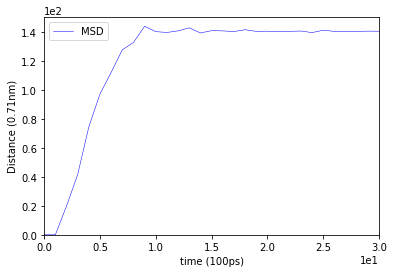

In [711]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\RMSDnonTimAve.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'b', color='blue', linewidth=0.5, label='MSD')
ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'c', color='red', linewidth=0.5, label='toluene', ax=ax)
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='interface', ax=ax)
ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Distance (0.71nm)') 
pylab.xlim([0,30])
pylab.ylim([0,150])# define the range of y coordinate
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig(r'C:\vmd\RMSDnonTimAve.png')

**Zmsd only the motion in z direction**

In [44]:
df = pd.DataFrame(Zmsd)
df.to_excel(r'C:\vmd\ZMSDnonTimAve.xlsx')

In [42]:
#logaritmic scale plot

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\ZMSDnonTimAve.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'b', color='blue', linewidth=0.5, label='Z coordinate')
ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'c', color='red', linewidth=0.5, label='homo', ax=ax)
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='janus', ax=ax)
#Sheet1.plot(kind='line',  x='a', y= 'e', color='orange', linewidth=0.5, label='random', ax=ax)
#Sheet1.plot(kind='line',  x='a', y= 'f', color='blue', linewidth=0.5, label='janusSecPos', ax=ax)
ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Distance (0.71nm)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([0,30])
pylab.ylim([0,150])# define the range of y coordinate
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))#show only the x axis in scientific mode when Y coordinate is in log scale
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig(r'C:\vmd\ZMSDnonTimAve.png')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\vmd\\ZMSDnonTimAve.xlsx'

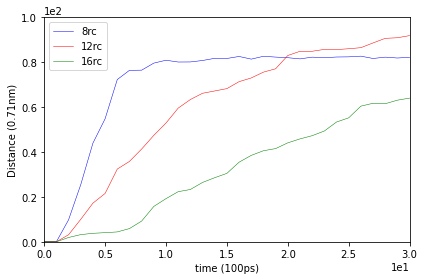

In [75]:
#logaritmic scale plot

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\Zmsd_8r,12,16rcDisc.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= '8rc', color='blue', linewidth=0.5, label='8rc')
ax.legend()
Sheet1.plot(kind='line',  y= '12rc', color='red', linewidth=0.5, label='12rc', ax=ax)
Sheet1.plot(kind='line',  y= '16rc', color='green', linewidth=0.5, label='16rc', ax=ax)
#Sheet1.plot(kind='line',  y= '(-)perpend', color='orange', linewidth=0.5, label='(-)perpend', ax=ax)
#Sheet1.plot(kind='line',  y= 'parallel', color='black', linewidth=0.5, label='parallel', ax=ax)

ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Distance (0.71nm)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([0,30])
pylab.ylim([0,100])# define the range of y coordinate
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))#show only the x axis in scientific mode when Y coordinate is in log scale
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig(r'C:\vmd\Zmsd_8r,12,16rcDisc.png')

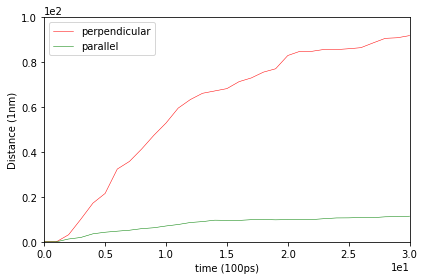

In [73]:
#logaritmic scale plot

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\z_msd_perpend_parallel.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'perpend', color='red', linewidth=0.5, label='perpendicular')
ax.legend()
Sheet1.plot(kind='line',  y= 'parallel', color='green', linewidth=0.5, label='parallel', ax=ax)
#Sheet1.plot(kind='line',  y= '16rc', color='green', linewidth=0.5, label='16rc', ax=ax)
#Sheet1.plot(kind='line',  y= '(-)perpend', color='orange', linewidth=0.5, label='(-)perpend', ax=ax)
#Sheet1.plot(kind='line',  y= 'parallel', color='black', linewidth=0.5, label='parallel', ax=ax)

ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Distance (1nm)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([0,30])
pylab.ylim([0,100])# define the range of y coordinate
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))#show only the x axis in scientific mode when Y coordinate is in log scale
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig(r'C:\vmd\z_msd_perpend_parallel.png')

<ipython-input-46-c1421bb61326>:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  pylab.ylim([0,100])# define the range of y coordinate


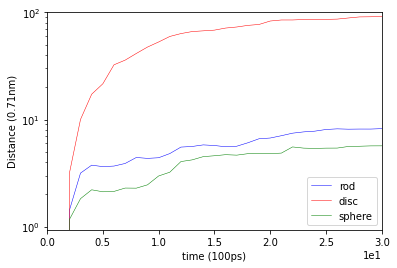

In [46]:
#logaritmic scale plot

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\rc1.0_ZMSD_12rc_rod_disc_sphere.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'rod', color='blue', linewidth=0.5, label='rod')
ax.legend()
Sheet1.plot(kind='line',  y= 'disc', color='red', linewidth=0.5, label='disc', ax=ax)
Sheet1.plot(kind='line',  y= 'sphere', color='green', linewidth=0.5, label='sphere', ax=ax)
#Sheet1.plot(kind='line',  y= '(-)perpend', color='orange', linewidth=0.5, label='(-)perpend', ax=ax)
#Sheet1.plot(kind='line',  y= 'parallel', color='black', linewidth=0.5, label='parallel', ax=ax)

ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Distance (0.71nm)') 
ax.set_yscale('log') #to plot in log scale

pylab.xlim([0,30])
pylab.ylim([0,100])# define the range of y coordinate
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))#show only the x axis in scientific mode when Y coordinate is in log scale
#plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig(r'C:\vmd\rc1.0_ZMSD_12rc_rod_disc_sphere(log).png')

# ThankGOD correct plot units

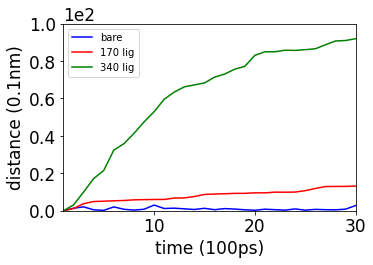

In [13]:
#ThankGOD correct plot units

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 
from matplotlib import rcParams
import matplotlib

df =pd.ExcelFile(r'C:\vmd\z_msd_bare_170,340lig.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'bare', color='blue', linewidth=1.5, label='bare')
ax.legend()
Sheet1.plot(kind='line',  y= '170 lig', color='red', linewidth=1.5, label='170 lig', ax=ax)
Sheet1.plot(kind='line',  y= '340 lig', color='green', linewidth=1.5, label='340 lig', ax=ax)
#Sheet1.plot(kind='line',  y= '(-)perpend', color='orange', linewidth=0.5, label='(-)perpend', ax=ax)
#Sheet1.plot(kind='line',  y= 'parallel', color='black', linewidth=0.5, label='parallel', ax=ax)

ax.legend()

##########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('distance (0.1nm)') 

pylab.xlim([1,30])
plt.xticks(np.arange(10,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([0,100])# define the range of y coordinate
plt.yticks(np.arange(0,100.1,20))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"
matplotlib.rcParams['legend.fontsize'] = 10

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))#show the x and y axis in scientific 
###########################################


plt.savefig(r'C:\vmd\z_msd_bare_170,340lig2.png')

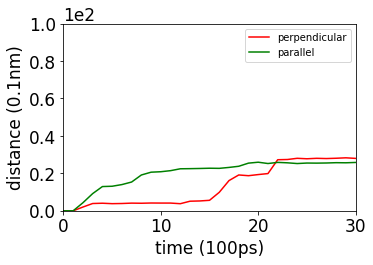

In [10]:
#thankGOD! final plot mehtod

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 
from matplotlib import rcParams
import matplotlib

df =pd.ExcelFile(r'C:\vmd\Z_msd_perpend_parallel.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'perpend', color='red', linewidth=1.5, label='perpendicular')
ax.legend()
#Sheet1.plot(kind='line', y= '45degree', color='red', linewidth=1.5, label='45˚', ax=ax)
#Sheet1.plot(kind='line', y= '(-)45degree', color='green', linewidth=1.5, label='135˚', ax=ax)
#Sheet1.plot(kind='line', y= '(-)perpend', color='orange', linewidth=1.5, label='180˚', ax=ax)
Sheet1.plot(kind='line', y= 'parallel', color='green', linewidth=1.5, label='parallel', ax=ax)
ax.legend()


##########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('distance (0.1nm)') 

pylab.xlim([1,30])
plt.xticks(np.arange(0,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([0,100])# define the range of y coordinate
plt.yticks(np.arange(0,100.1,20))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"
matplotlib.rcParams['legend.fontsize'] = 10

#plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))#show the x and y axis in scientific 
###########################################


plt.savefig(r'C:\vmd\Z_msd_perpend_parallel2.png')

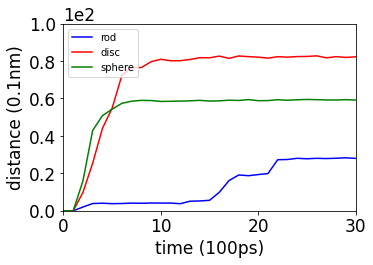

In [11]:
#ThankGOD correct plot units
#thankGOD! 

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 
from matplotlib import rcParams
import matplotlib

df =pd.ExcelFile(r'C:\vmd\z_msd_rod_disc_sphere.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'rod', color='blue', linewidth=1.5, label='rod')
ax.legend()
Sheet1.plot(kind='line',  y= 'disc', color='red', linewidth=1.5, label='disc', ax=ax)
Sheet1.plot(kind='line',  y= 'sphere', color='green', linewidth=1.5, label='sphere', ax=ax)
#Sheet1.plot(kind='line',  y= '(-)perpend', color='orange', linewidth=0.5, label='(-)perpend', ax=ax)
#Sheet1.plot(kind='line',  y= 'parallel', color='black', linewidth=0.5, label='parallel', ax=ax)
ax.legend()


##########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('distance (0.1nm)') 

pylab.xlim([1,30])
plt.xticks(np.arange(0,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([0,100])# define the range of y coordinate
plt.yticks(np.arange(0,100.1,20))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"
matplotlib.rcParams['legend.fontsize'] = 10

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))#show the x and y axis in scientific 
###########################################


plt.savefig(r'C:\vmd\z_msd_rod_disc_sphere2.png')

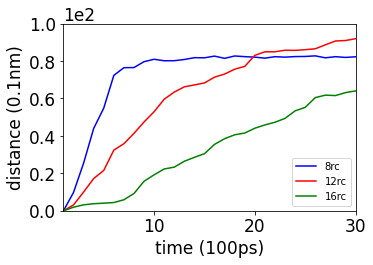

In [9]:
#logaritmic scale plot

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 
from matplotlib import rcParams
import matplotlib

df =pd.ExcelFile(r'C:\vmd\Zmsd_8r,12,16rcDisc.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= '8rc', color='blue', linewidth=1.5, label='8rc')
ax.legend()
Sheet1.plot(kind='line',  y= '12rc', color='red', linewidth=1.5, label='12rc', ax=ax)
Sheet1.plot(kind='line',  y= '16rc', color='green', linewidth=1.5, label='16rc', ax=ax)
#Sheet1.plot(kind='line',  y= '(-)perpend', color='orange', linewidth=0.5, label='(-)perpend', ax=ax)
#Sheet1.plot(kind='line',  y= 'parallel', color='black', linewidth=0.5, label='parallel', ax=ax)
ax.legend()


##########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('distance (0.1nm)') 

pylab.xlim([1,30])
plt.xticks(np.arange(10,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([0,100])# define the range of y coordinate
plt.yticks(np.arange(0,100.1,20))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"
matplotlib.rcParams['legend.fontsize'] = 10

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))#show the x and y axis in scientific 
###########################################


plt.savefig(r'C:\vmd\Zmsd_8r,12,16rcDisc.png')

# Xmsd only the motion in x direction


In [671]:
df = pd.DataFrame(Xmsd)
df.to_excel(r'C:\vmd\XMSDnonTimAve.xlsx')

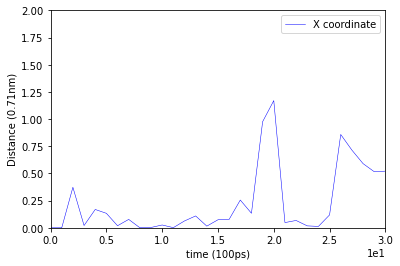

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\XMSDnonTimAve.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'b', color='blue', linewidth=0.5, label='X coordinate')
ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'c', color='red', linewidth=0.5, label='toluene', ax=ax)
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='interface', ax=ax)
ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Distance (0.71nm)') 
pylab.xlim([0,30])
pylab.ylim([0,2])# define the range of y coordinate
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig(r'C:\vmd\XMSDnonTimAve.png')

# Ymsd only the motion in y direction


In [673]:
df = pd.DataFrame(Ymsd)
df.to_excel(r'C:\vmd\YMSDnonTimAve.xlsx')

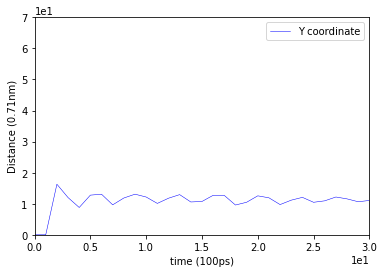

In [674]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\YMSDnonTimAve.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'b', color='blue', linewidth=0.5, label='Y coordinate')
ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'c', color='red', linewidth=0.5, label='toluene', ax=ax)
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='interface', ax=ax)
ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Distance (0.71nm)') 
pylab.xlim([0,30])
pylab.ylim([0,70])# define the range of y coordinate
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig(r'C:\vmd\YMSDnonTimAve.png')

# **time ave MSD**

In [180]:
#thankGOd! time ave MSD:
MSD=np.zeros  (num_frame)

for i in range (0,num_frame):
  if i==0:
    Rmsd[i]=0
    
  MSD[i]=Rmsd[i]/(num_frame)
  print(i,"",MSD[i])

0  0.0
1  0.0
2  0.30568001816138846
3  0.42278634329114306
4  0.6432571249757671
5  0.6241974676246411
6  0.6757924038165782
7  0.8359801063510812
8  0.7969361715039993
9  0.8705626492780918
10  0.8532316510235821
11  0.8496541284945508
12  0.9205802574304692
13  0.9020988577808211
14  0.8887344734054751
15  0.9124761137152672
16  0.9665328943945835
17  0.9247687279441597
18  1.0786209965560187
19  1.0175817488590861
20  1.0779836776637308
21  0.9708008060071142
22  1.0391185627324568
23  0.9720243154389053
24  0.9537053828620935
25  0.99900354594921
26  0.9605301592393641
27  0.9673022989015996
28  1.0166256965801792
29  1.110917414445774
30  1.025293524549834


In [181]:
df = pd.DataFrame(MSD)
df.to_excel(r'C:\vmd\MSD_TimAve.xlsx')

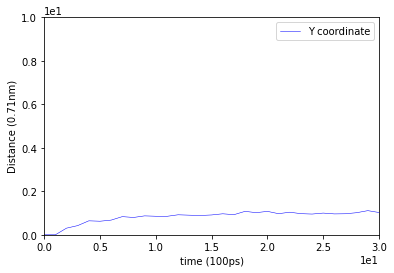

In [182]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\MSD_TimAve.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'b', color='blue', linewidth=0.5, label='Y coordinate')
ax.legend()
#Sheet1.plot(kind='line',  x='a', y= 'c', color='red', linewidth=0.5, label='toluene', ax=ax)
#Sheet1.plot(kind='line',  x='a', y= 'd', color='green', linewidth=0.5, label='interface', ax=ax)
ax.legend()
ax.set_xlabel('time (100ps)')
ax.set_ylabel('Distance (0.71nm)') 
pylab.xlim([0,30])
pylab.ylim([0,10])# define the range of y coordinate
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
plt.savefig(r'C:\vmd\MSD_TimAve.png')

In [ ]:
MSDx=np.zeros (num_frame)

for i in range (0,num_frame):
 if i==0:
    Xmsd[i]=0
    
 MSDx[i]=Xmsd[i]/((num_frame-i)*num_atom_type)
 print(MSDx)

In [ ]:
MSDy=np.zeros (num_frame)

for i in range (0,num_frame):
 if i==0:
    Ymsd[i]=0
    
 MSDy[i]=Ymsd[i]/((num_frame-i)*num_atom_type)
 print(MSDy)

In [ ]:
#non time ave MSD of NP that from far distance reach to wall (at zero Z)
MSDz=np.zeros (num_frame)

for i in range (1,num_frame):
 if i==0:
    Zmsd[i]=0
    
 MSDz[i]=Zmsd[i]/(num_frame)
 print(i,"",MSDz[i])

1  4.280895580579744
2  4.15719154317714
3  4.025338036656669
4  3.685404200387202
5  3.3802451773348903
6  3.1399944862808136
7  2.9477191067475306
8  2.7354961736760717
9  2.643188488990805
10  2.5200533700890944
11  2.3616579883652458
12  2.308761519818239
13  2.1831554313504156
14  2.133800502310391
15  2.0783965068750936
16  2.0699968466934955
17  2.0691958157025074
18  2.0549980205205993
19  2.042282818074421
20  1.9994314316576376
21  1.9845780347499644
22  1.9845780347499644
23  1.9522544740619243
24  1.9522544740619243
25  1.9522544740619243
26  1.9075162501220495
27  1.8939470716720035
28  1.8939470716720035
29  1.9166564354740971
30  1.8752672657949259
31  1.884112816323898
32  1.884112816323898
33  1.8824463601113688
34  1.8475279231592152
35  1.8475279231592152
36  1.8092542741915816
37  1.8034063700793592
38  1.798792568265071
39  1.798792568265071
40  1.7830435270747786
41  1.740015776923464
42  1.7469502036063849
43  1.7387515234859552
44  1.7387515234859552
45  1.72982